<a href="https://colab.research.google.com/github/fabiobatistapinheiro/Acidentes-em-Rodovias-Federais/blob/main/Previsibilidade_de_Acidentes_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dados: https://www.gov.br/prf/pt-br/acesso-a-informacao/dados-abertos/dados-abertos-acidentes


# Bibliotecas
Bibliotecas utilizadas durante o projeto

In [ ]:
%%time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
CPU times: user 59.9 ms, sys: 8.45 ms, total: 68.3 ms
Wall time: 5.67 s


# Importação e tratamento dos dados

Todos os arquivos estão salvos dentro do google drive:
https://drive.google.com/drive/folders/1e2NJqgisIYBYmQqaE9FEAEsSAYOJKQs5?usp=drive_link

In [ ]:
%%time
#Arquivos salvos no Google Drive , Importar utiliando pandas
dados_2023 = pd.read_csv("/content/drive/MyDrive/00 - TCC V2/Database/datatran2023.csv", delimiter= ';', encoding= 'utf-8')
dados_2022 = pd.read_csv("/content/drive/MyDrive/00 - TCC V2/Database/datatran2022.csv", delimiter= ';', encoding= 'utf-8')

#Agrupar dados de 2023 e 2022
df = pd.concat([dados_2023, dados_2022])

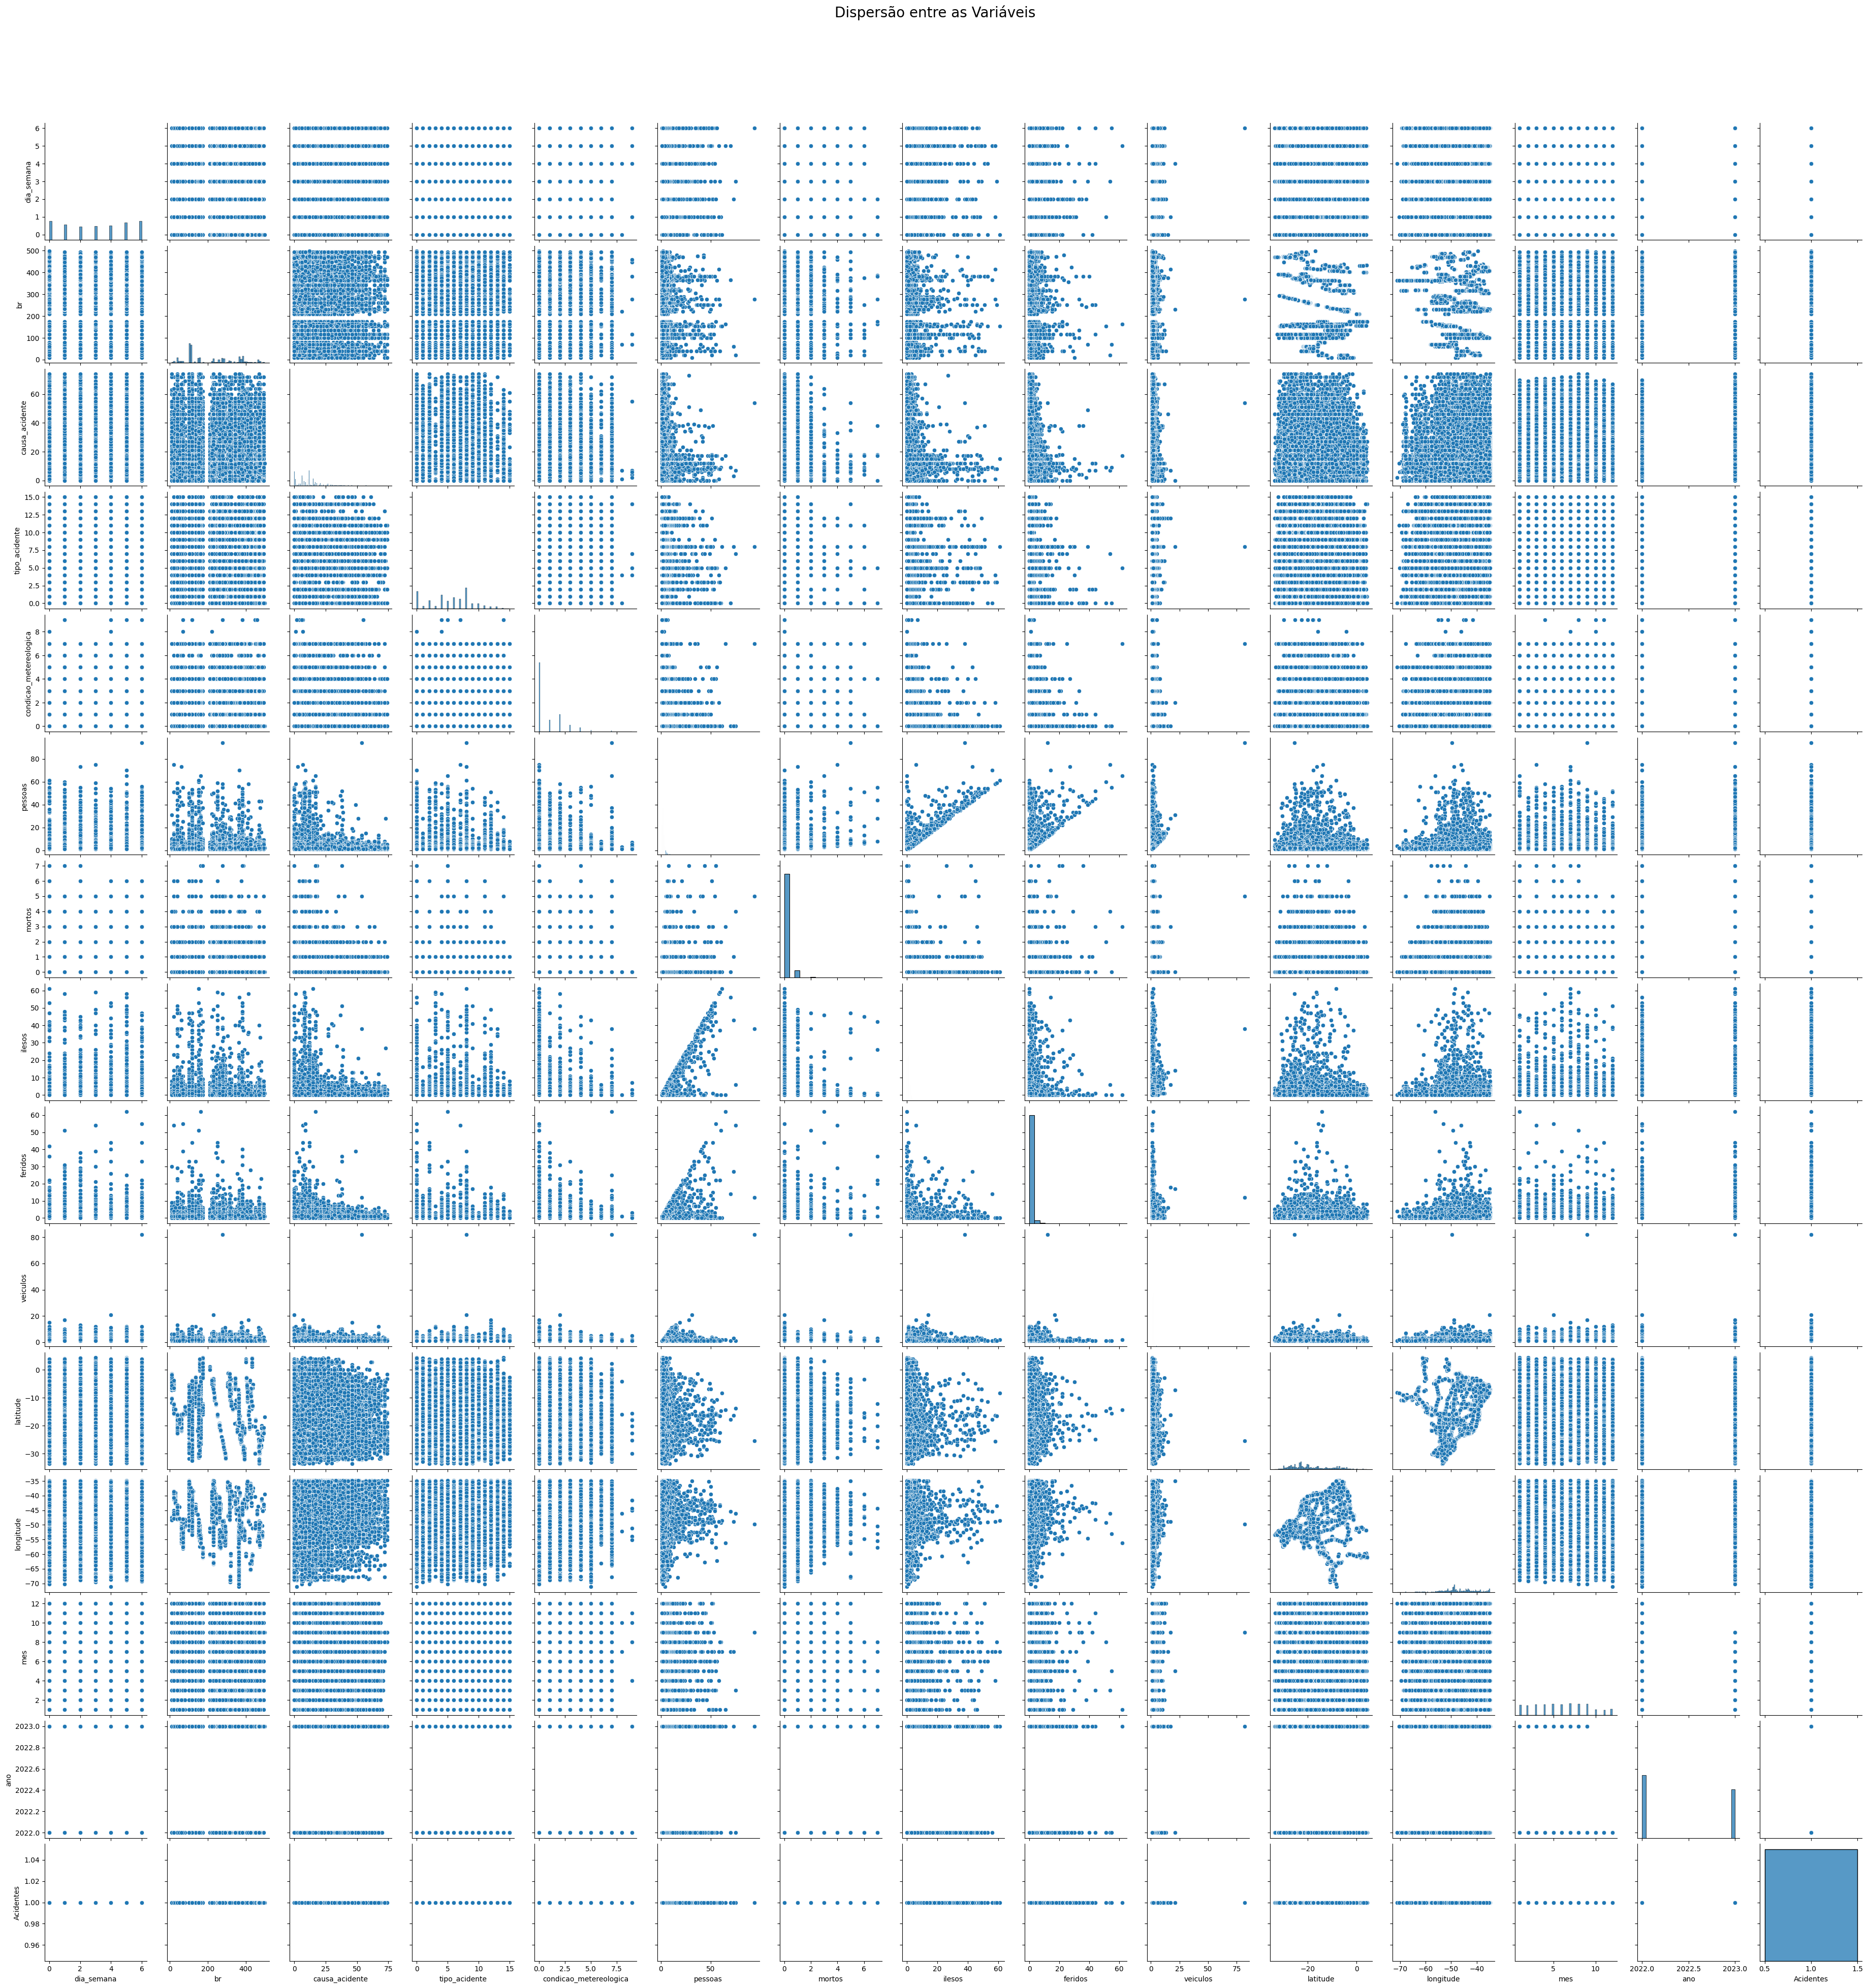

In [ ]:
ax = sns.pairplot(df)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

In [ ]:
%%time
#Alterar data inversa para formato Datetime
df['data_inversa'] = pd.to_datetime(df['data_inversa'], format='%d/%m/%Y')

#Ordenar os dados por data de forma ascendente
df = df.sort_values(by='data_inversa', ascending=True)

#Remover duplicados
duplicados = df['id'].duplicated().any()
resultado = "Sim" if duplicados else "Não"
print("Existem IDs duplicados?", resultado)

#Remover colunas desnecessárias
df.drop(['uf', 'km','fase_dia','sentido_via','tipo_pista','tracado_via','uso_solo','ignorados','delegacia','uop','horario','feridos_leves','feridos_graves'], axis=1, inplace=True)
print("Colunas desnecessárias removidas")

#remover valores NAN
df = df.dropna()
print("Valores NAN removidos")

Existem IDs duplicados? Não
Colunas desnecessárias removidas
Valores NAN removidos
CPU times: user 341 ms, sys: 13.4 ms, total: 354 ms
Wall time: 358 ms


In [ ]:
df.dtypes

id                                 int64
data_inversa              datetime64[ns]
dia_semana                        object
br                               float64
municipio                         object
causa_acidente                    object
tipo_acidente                     object
classificacao_acidente            object
condicao_metereologica            object
pessoas                            int64
mortos                             int64
ilesos                             int64
feridos                            int64
veiculos                           int64
latitude                          object
longitude                         object
regional                          object
dtype: object

In [ ]:
%%time
#df = df.loc[df['classificacao_acidente'] == 'Com Vítimas Fatais'].copy()
df['mes_ano'] = df['data_inversa'].dt.to_period('M').astype(str)
df['mes'] = df['data_inversa'].dt.month
df['ano'] = df['data_inversa'].dt.year
df['id'] = df['id'].astype(str)
df['Acidentes'] = 1

df['latitude'] = pd.to_numeric(df['latitude'].str.replace(',', '.'), errors='coerce').astype(float)
df['longitude'] = pd.to_numeric(df['longitude'].str.replace(',', '.'), errors='coerce').astype(float)


df_acidentes_fatais = df.loc[df['classificacao_acidente'] == 'Com Vítimas Fatais'].copy()

CPU times: user 1.14 s, sys: 48.6 ms, total: 1.19 s
Wall time: 1.21 s


In [ ]:
df.dtypes

id                                object
data_inversa              datetime64[ns]
dia_semana                        object
br                               float64
municipio                         object
causa_acidente                    object
tipo_acidente                     object
classificacao_acidente            object
condicao_metereologica            object
pessoas                            int64
mortos                             int64
ilesos                             int64
feridos                            int64
veiculos                           int64
latitude                         float64
longitude                        float64
regional                          object
mes_ano                           object
mes                                int64
ano                                int64
Acidentes                          int64
dtype: object

#Descrição do conjunto de dados

| Coluna                 | Descrição                                                                           |
|------------------------|-------------------------------------------------------------------------------------|
| id                     | Identificador do registro.                                                         |
| data_inversa           | Data do acidente no formato DD/MM/AAAA.                                            |
| dia_semana             | Dia da semana.                                                                     |
| horario                | Horário do acidente.                                                               |
| uf                     | Unidade Federativa (sigla).                                                        |
| br                     | Número da rodovia federal.                                                         |
| km                     | Quilômetro exato.                                          			      |
| municipio              | Município onde o acidente aconteceu.                                               |
| causa_acidente         | Causa principal do acidente.                                     		      |
| tipo_acidente          | Tipo de acidente.                                   			              |
| classificacao_acidente | Classificação do acidente (Com Vítimas Feridas, Sem Vítimas, etc.).                |
| fase_dia               | Fase do dia em que o acidente ocorreu (Plena Noite, Pleno Dia, etc.).              |
| sentido_via            | Sentido da via no momento do acidente.                                             |
| condicao_metereologica | Condição meteorológica no momento do acidente.                                     |
| tipo_pista             | Tipo de pista (Simples, Dupla, etc.).                                              |
| tracado_via            | Traçado da via (Reta, Curva, etc.).                                                |
| uso_solo               | Indica se o acidente ocorreu em área urbana ou rural (Sim ou Não).                 |
| pessoas                | Número total de pessoas envolvidas.                                    |
| mortos                 | Número de mortos.                                                      |
| feridos_leves          | Número de feridos leves.                                               |
| feridos_graves         | Número de feridos graves.                                              |
| ilesos                 | Número de pessoas ilesas.                                              |
| ignorados              | Número de envolvidos sem status informado.                                |
| feridos                | Número total de feridos.                                               |
| veiculos               | Número total de veículos.                                   |
| latitude               | Coordenada geográfica da latitude.                         |
| longitude              | Coordenada geográfica da longitude.                        |
| regional               | Regional da Polícia Rodoviária Federal responsável pela área|
| delegacia              | Delegacia responsável pela área.                            |
| uop                    | Unidade Operacional da Polícia Rodoviária Federal. |


# Verificando dados duplicados ou faltantes

Os dados faltantes são irrelevantes para analise e criação do modelo, optei por não fazer nenhum tratamento quanto a eles.

In [ ]:
%%time
duplicados = df_acidentes_fatais['id'].duplicated().any() #Obserado pelo ID por ser um numero unico
resultado = "Sim" if duplicados else "Não"
print("Existem IDs duplicados?", resultado)

Existem IDs duplicados? Não
CPU times: user 3.99 ms, sys: 0 ns, total: 3.99 ms
Wall time: 3.94 ms


Considerando que cada ID é uma ocorrência, consideramos que não existem informações duplicadas.

#Análise descritiva

In [ ]:
%%time
#Resumo estatitico
df_acidentes_fatais.describe()

CPU times: user 41.1 ms, sys: 746 µs, total: 41.8 ms
Wall time: 42 ms


br      pessoas       mortos       ilesos      feridos  \
count  8226.000000  8226.000000  8226.000000  8226.000000  8226.000000   
mean    221.712132     3.275103     1.161439     0.968028     0.828592   
std     127.552099     4.078119     0.534705     2.641925     2.268278   
min      10.000000     1.000000     1.000000     0.000000     0.000000   
25%     116.000000     2.000000     1.000000     0.000000     0.000000   
50%     222.000000     2.000000     1.000000     1.000000     0.000000   
75%     343.000000     4.000000     1.000000     1.000000     1.000000   
max     495.000000    94.000000     7.000000    49.000000    62.000000   

          veiculos     latitude    longitude          mes          ano  \
count  8226.000000  8226.000000  8226.000000  8226.000000  8226.000000   
mean      1.753465   -16.801070   -46.243302     5.982373  2022.433747   
std       1.168275     8.047660     6.396287     3.155474     0.495621   
min       1.000000   -33.540749   -69.277923     1.000000  2022.000000   
25%       1.000000   -23.292675   -50.645307     3.000000  2022.000000   
50%       2.000000   -17.992038   -46.462581     6.000000  2022.000000   
75%       2.000000    -9.372867   -41.205925     8.000000  2023.000000   
max      82.000000     4.340420   -34.828400    12.000000  2023.000000   

       Acidentes  
count     8226.0  
mean         1.0  
std          0.0  
min          1.0  
25%          1.0  
50%          1.0  
75%          1.0  
max          1.0

- Média alta de pessoas envolvidas em acidentes com desvio padrão de 4,07

- Com uma média de pessoas envolvidas em acidente de 3,27, e um valor máximo de 94, indica que há eventos mais graves com um numéro alta quantidade de envolvidos

- numero de veiculos envolvidos por acidente é de 1,75, com um Máximo de 82 veiculos, o que nos leva a crer que existem eventos mais complexos como engavetamentos.


<timed exec>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


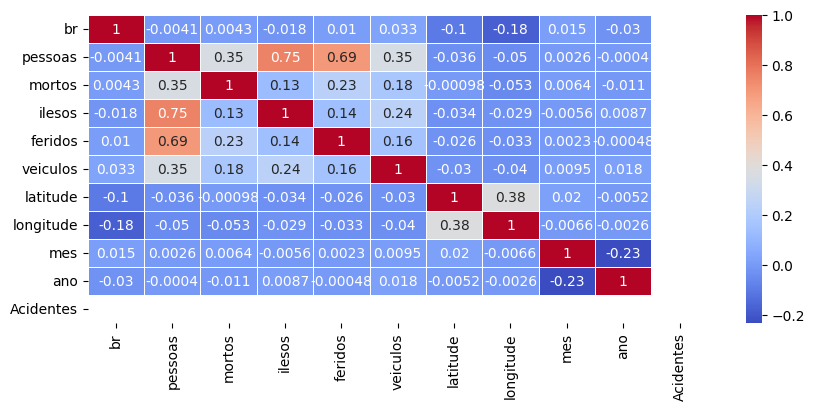

CPU times: user 551 ms, sys: 108 ms, total: 659 ms
Wall time: 551 ms


In [ ]:
%%time
# teste de correlação, cada célula do mapa de calor representa a correlação entre duas variáveis, variando de -1 (correlação negativa perfeita) a 1 (correlação positiva perfeita)
plt.figure(figsize=(10, 4))
sns.heatmap(df_acidentes_fatais.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

0 a 0,2: Correlação muito fraca </br>
0,2 a 0,4: Correlação fraca </br>
0,4 a 0,6: Correlação moderada </br>
0,6 a 0,8: Correlação forte </br>
0,8 a 1,0: Correlação muito forte </br>

Não foram encontradas fortes correlações que não sejam obvias dentro da tabela, talvez explorar correlações com outros itens

In [ ]:
df_acidentes_fatais.head()

id data_inversa dia_semana     br              municipio  \
17050  405227   2022-01-01     sábado  470.0                 ILHOTA   
17101  405297   2022-01-01     sábado  101.0                CAMACAN   
17107  405305   2022-01-01     sábado  101.0  CAMPOS DOS GOYTACAZES   
17130  405339   2022-01-01     sábado  101.0         CRUZ DAS ALMAS   
17098  405294   2022-01-01     sábado  402.0                  MARCO   

                             causa_acidente              tipo_acidente  \
17050               Velocidade Incompatível           Colisão traseira   
17101               Velocidade Incompatível           Colisão traseira   
17107         Entrada inopinada do pedestre  Atropelamento de Pedestre   
17130                Ultrapassagem Indevida            Colisão frontal   
17098  Demais falhas mecânicas ou elétricas            Colisão frontal   

      classificacao_acidente condicao_metereologica  pessoas  ...  ilesos  \
17050     Com Vítimas Fatais              Céu Claro        5  ...       2   
17101     Com Vítimas Fatais              Céu Claro        2  ...       1   
17107     Com Vítimas Fatais              Céu Claro        2  ...       1   
17130     Com Vítimas Fatais              Céu Claro        2  ...       1   
17098     Com Vítimas Fatais                Nublado        5  ...       0   

       feridos  veiculos   latitude  longitude  regional  mes_ano mes   ano  \
17050        2         2 -26.842903 -48.794366   SPRF-SC  2022-01   1  2022   
17101        0         2 -15.506674 -39.431982   SPRF-BA  2022-01   1  2022   
17107        0         1 -21.910702 -41.610991   SPRF-RJ  2022-01   1  2022   
17130        0         2 -12.651171 -39.120376   SPRF-BA  2022-01   1  2022   
17098        4         2  -3.197325 -40.087327   SPRF-CE  2022-01   1  2022   

       Acidentes  
17050          1  
17101          1  
17107          1  
17130          1  
17098          1  

[5 rows x 21 columns]

#Análise Exploratória

In [ ]:
df_acidentes_ytd = df_acidentes_fatais.loc[(df_acidentes_fatais['mes'].isin([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]))]
mortes_ano = df_acidentes_ytd.groupby(['ano'])['pessoas','mortos','veiculos'].sum().reset_index()
mortes_ano = pd.DataFrame(mortes_ano)
mortes_ano['Pessoas por veiculo'] = mortes_ano['pessoas'] / mortes_ano['veiculos']
mortes_ano['Mortes por veiculo'] = mortes_ano['mortos'] / mortes_ano['veiculos']
mortes_ano

<ipython-input-37-fb04ccf1f47a>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mortes_ano = df_acidentes_ytd.groupby(['ano'])['pessoas','mortos','veiculos'].sum().reset_index()


ano  pessoas  mortos  veiculos  Pessoas por veiculo  Mortes por veiculo
0  2022    12764    4548      6765             1.886770            0.672284
1  2023    11679    4119      6340             1.842114            0.649685

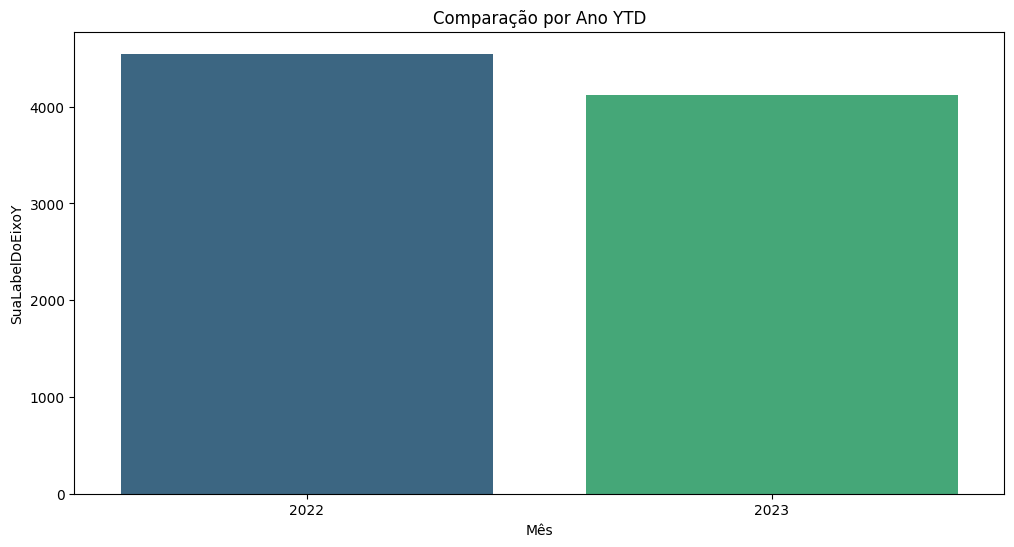

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='ano', y='mortos', data=mortes_ano, palette='viridis')
plt.title('Comparação por Ano YTD')
plt.xlabel('Mês')
plt.ylabel('SuaLabelDoEixoY')
plt.show()

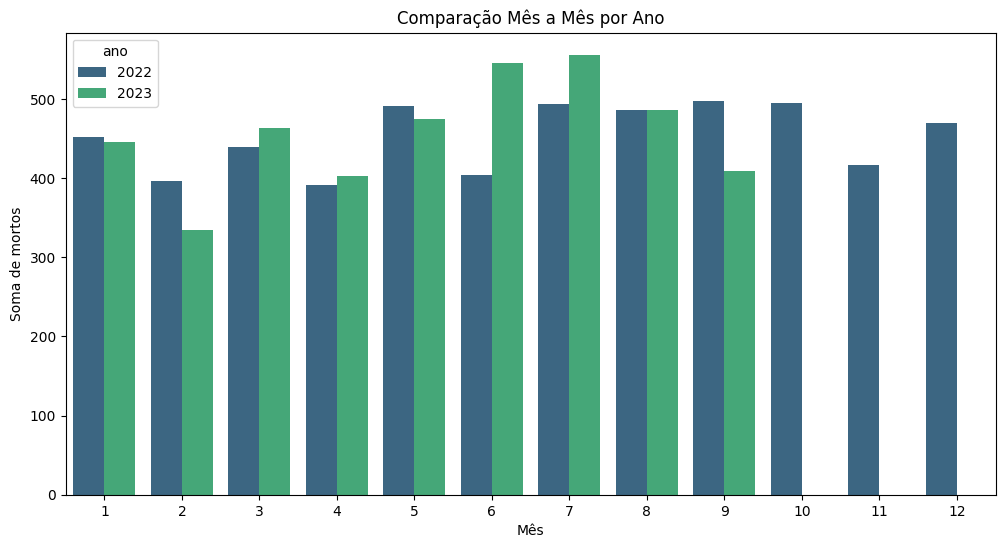

In [ ]:
df_dinamica_mes_ano = df_acidentes_fatais.pivot_table(values='mortos', index=['mes','ano'], aggfunc=sum, fill_value=0).reset_index()
df_dinamica_mes_ano = df_dinamica_mes_ano.sort_values(by='mortos', ascending=False)
df_dinamica_mes_ano

ordem_meses = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,12]
df_dinamica_mes_ano['mes'] = pd.Categorical(df_dinamica_mes_ano['mes'], categories=ordem_meses, ordered=True)
df_dinamica_mes_ano = df_dinamica_mes_ano.sort_values(by=['ano', 'mes'])



plt.figure(figsize=(12, 6))
sns.barplot(x='mes', y='mortos', hue='ano', data=df_dinamica_mes_ano, palette='viridis')
plt.title('Comparação Mês a Mês por Ano')
plt.xlabel('Mês')
plt.ylabel('Soma de mortos')
plt.show()

Tanto no ano, como mês a mês 2023 possui menor quantidade de vitimas que 2022, mas está bem próximo de 2021.

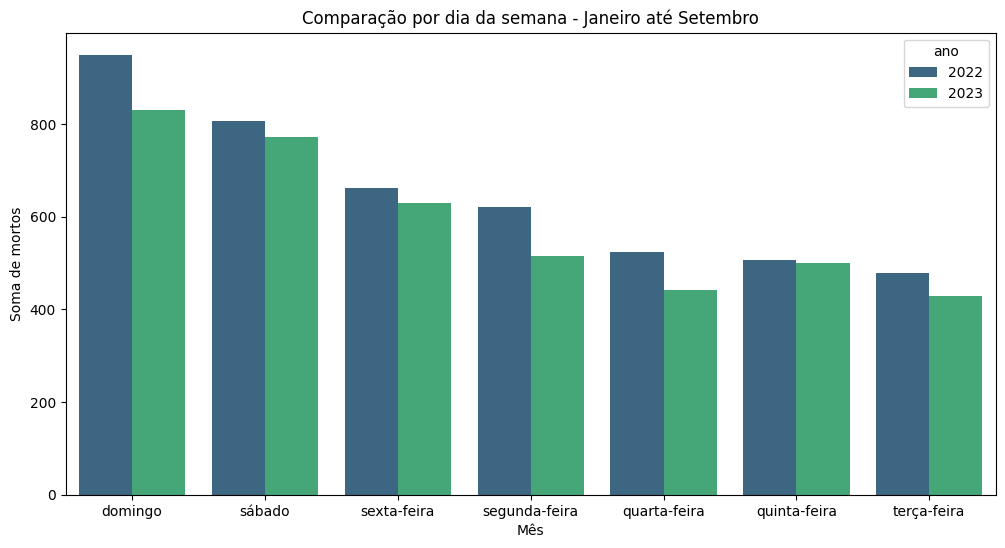

In [ ]:
df_dinamica_semana = df_acidentes_ytd.pivot_table(values='mortos', index=['dia_semana','ano'], aggfunc=sum, fill_value=0).reset_index()
df_dinamica_semana = df_dinamica_semana.sort_values(by='mortos', ascending=False)
df_dinamica_semana

plt.figure(figsize=(12, 6))
sns.barplot(x='dia_semana', y='mortos', hue='ano', data=df_dinamica_semana, palette='viridis')
plt.title('Comparação por dia da semana - Janeiro até Setembro')
plt.xlabel('Mês')
plt.ylabel('Soma de mortos')
plt.show()

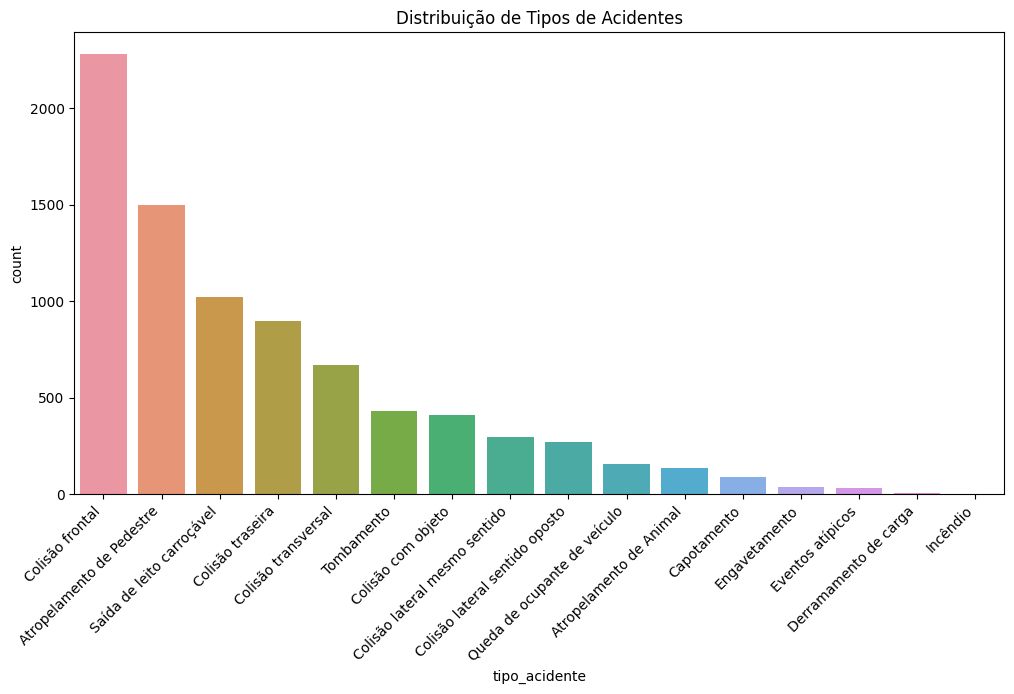

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_acidentes_fatais, x='tipo_acidente', order=df_acidentes_fatais['tipo_acidente'].value_counts().index)
plt.xticks(rotation=45, ha="right")
plt.title('Distribuição de Tipos de Acidentes')
plt.show()

In [ ]:
df_dinamica = df_acidentes_fatais.pivot_table(values='mortos', index='tipo_acidente', columns='ano', aggfunc=sum, fill_value=0)
df_dinamica = df_dinamica.sort_values(by=2023, ascending=False)
df_dinamica

ano                             2022  2023
tipo_acidente                             
Colisão frontal                 1680  1321
Atropelamento de Pedestre        864   656
Saída de leito carroçável        699   477
Colisão traseira                 578   427
Colisão transversal              435   322
Colisão com objeto               267   191
Tombamento                       272   189
Colisão lateral sentido oposto   193   158
Colisão lateral mesmo sentido    187   150
Queda de ocupante de veículo      78    77
Atropelamento de Animal           79    64
Capotamento                       56    41
Engavetamento                     20    27
Eventos atípicos                  22    16
Incêndio                           0     2
Derramamento de carga              5     1

In [ ]:
%%time
#import folium
#from folium.plugins import MarkerCluster

# Criar um mapa centrado em uma localização inicial
#mapa = folium.Map(location=[-15.788497, -47.879873], zoom_start=4, width='80%', height='80%')

# Criar um cluster de marcadores para melhorar a visualização em áreas densamente povoadas
#marker_cluster = MarkerCluster().add_to(mapa)

# Adicionar marcadores para cada acidente no conjunto de dados
#for index, acidente in df_acidentes_fatais.iterrows():
#    folium.Marker(
##        location=[float(acidente['latitude'].replace(',', '.')),
#                  float(acidente['longitude'].replace(',', '.'))],
#        popup=f"Tipo de Acidente: {acidente['tipo_acidente']}, Causa: {acidente['causa_acidente']}",
#    ).add_to(marker_cluster)

# Exibir o mapa
#mapa.save("mapa_acidentes.html")


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.11 µs


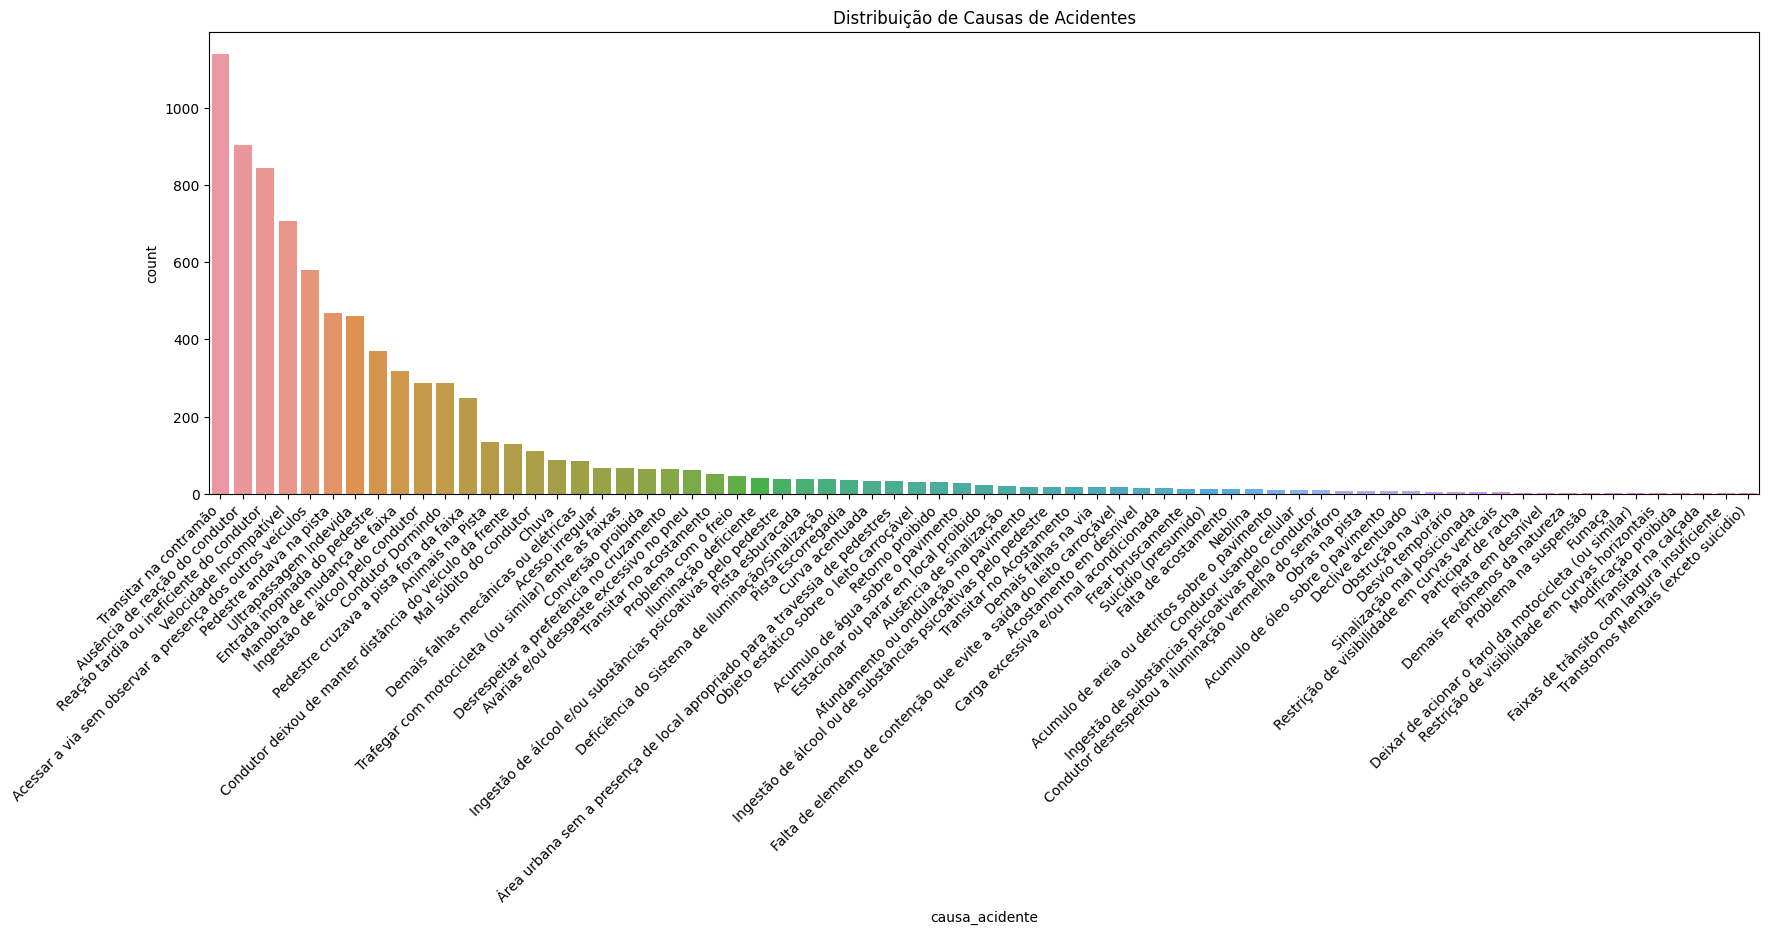

In [ ]:
plt.figure(figsize=(20, 6))
sns.countplot(data=df_acidentes_fatais, x='causa_acidente', order=df_acidentes_fatais['causa_acidente'].value_counts().index)
plt.xticks(rotation=45, ha="right")
plt.title('Distribuição de Causas de Acidentes')
plt.show()

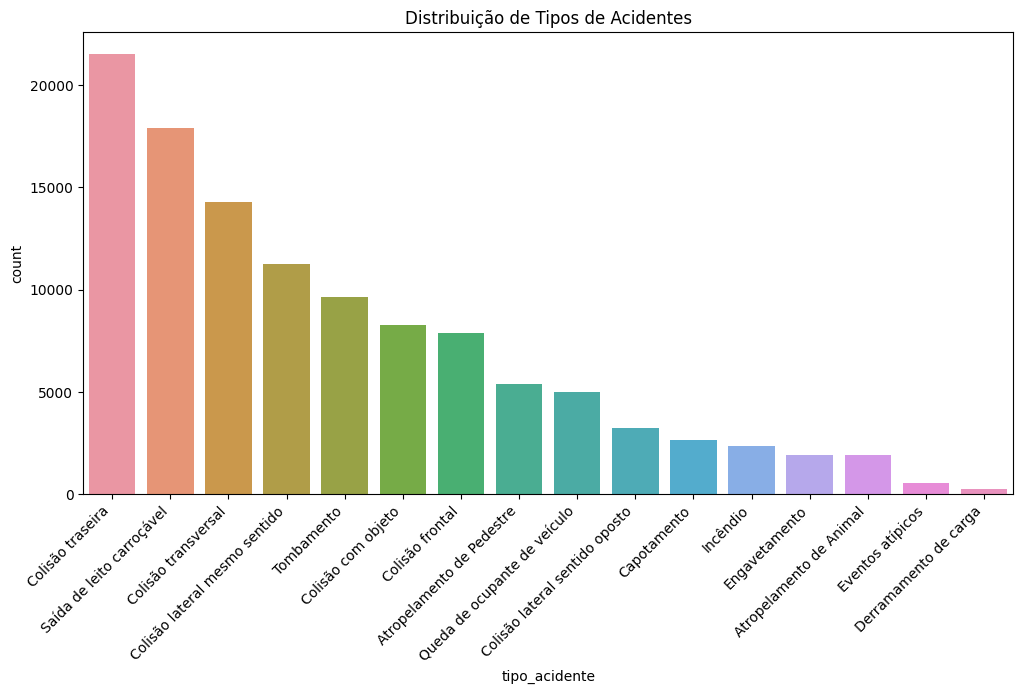

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='tipo_acidente', order=df['tipo_acidente'].value_counts().index)
plt.xticks(rotation=45, ha="right")
plt.title('Distribuição de Tipos de Acidentes')
plt.show()


In [ ]:
df.head()

id data_inversa dia_semana     br                  municipio  \
17039  405214   2022-01-01     sábado  282.0        SAO JOSE DO CERRITO   
17058  405237   2022-01-01     sábado  290.0  SANTO ANTONIO DA PATRULHA   
17059  405238   2022-01-01     sábado   20.0                   BRASILIA   
17060  405240   2022-01-01     sábado  381.0               POUSO ALEGRE   
17061  405241   2022-01-01     sábado   40.0                  NOVA LIMA   

                          causa_acidente              tipo_acidente  \
17039     Ausência de reação do condutor  Saída de leito carroçável   
17058   Ingestão de álcool pelo condutor  Saída de leito carroçável   
17059  Acumulo de água sobre o pavimento                Capotamento   
17060                  Frear bruscamente         Colisão com objeto   
17061                              Chuva  Saída de leito carroçável   

      classificacao_acidente condicao_metereologica  pessoas  ...  ilesos  \
17039    Com Vítimas Feridas              Céu Claro        1  ...       0   
17058            Sem Vítimas              Céu Claro        2  ...       2   
17059    Com Vítimas Feridas                  Chuva        5  ...       1   
17060    Com Vítimas Feridas                Nublado        1  ...       0   
17061    Com Vítimas Feridas                  Chuva        2  ...       1   

       feridos  veiculos   latitude  longitude  regional  mes_ano mes   ano  \
17039        1         1 -27.691267 -50.561481   SPRF-SC  2022-01   1  2022   
17058        0         1 -29.864990 -50.410789   SPRF-RS  2022-01   1  2022   
17059        4         1 -15.577153 -47.467113   SPRF-DF  2022-01   1  2022   
17060        1         1 -22.303197 -45.901320   SPRF-MG  2022-01   1  2022   
17061        1         1 -20.047764 -43.964394   SPRF-MG  2022-01   1  2022   

       Acidentes  
17039          1  
17058          1  
17059          1  
17060          1  
17061          1  

[5 rows x 21 columns]

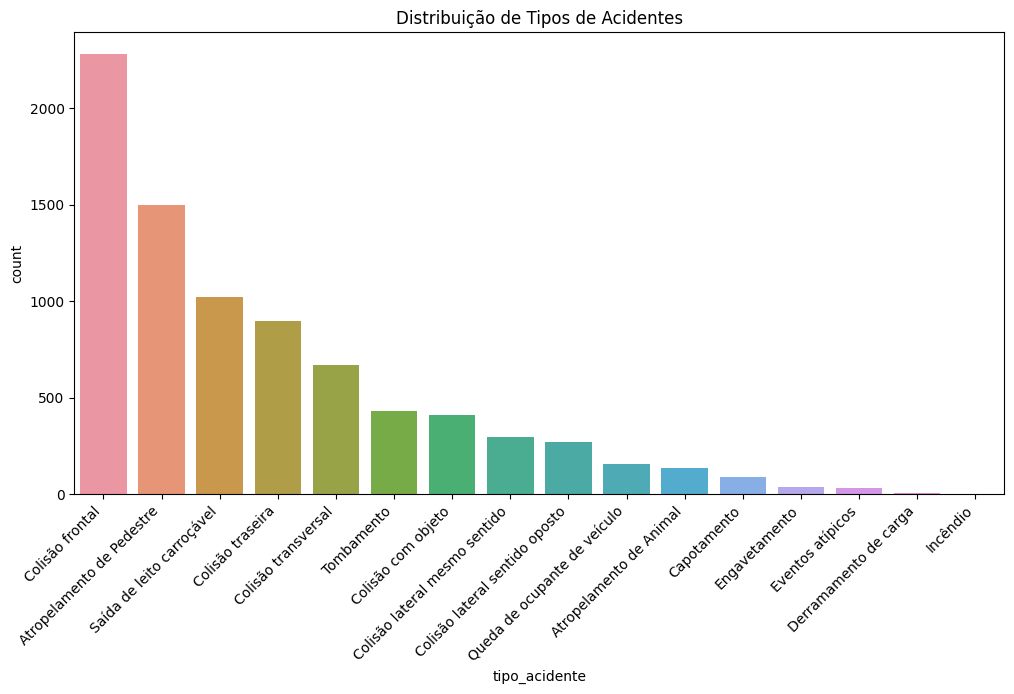

In [ ]:

plt.figure(figsize=(12, 6))
sns.countplot(data=df_acidentes_fatais, x='tipo_acidente', order=df_acidentes_fatais['tipo_acidente'].value_counts().index)
plt.xticks(rotation=45, ha="right")
plt.title('Distribuição de Tipos de Acidentes')
plt.show()

# Testando Correlações

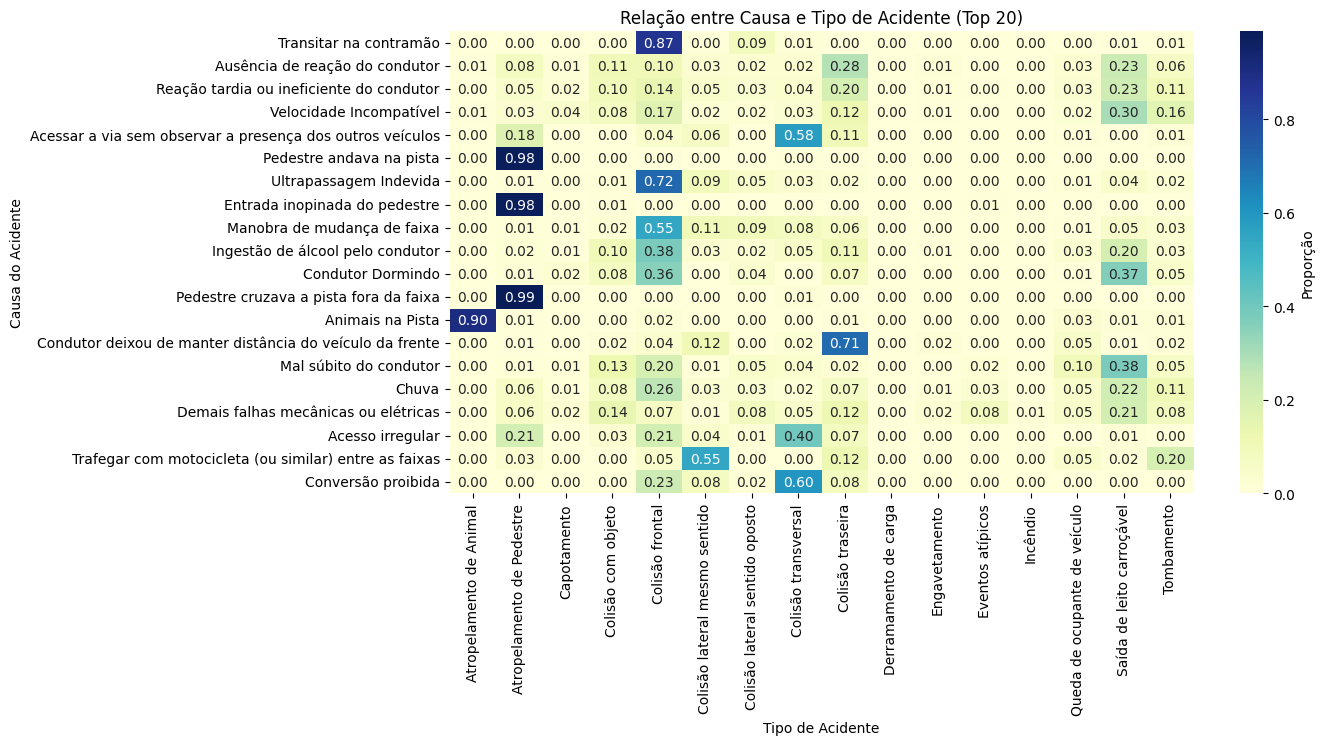

In [ ]:
# Ordenar as causas de acidentes pelo total de ocorrências
causas_ordenadas = df_acidentes_fatais['causa_acidente'].value_counts().index

# Reordenar a coluna 'causa_acidente' no DataFrame
df_acidentes_fatais['causa_acidente'] = pd.Categorical(df_acidentes_fatais['causa_acidente'], categories=causas_ordenadas, ordered=True)

# Criar uma tabela de contagem (crosstab) para a relação entre Causa e Tipo de Acidente
tabela_contagem = pd.crosstab(df_acidentes_fatais['causa_acidente'], df_acidentes_fatais['tipo_acidente'])

# Normalizar para obter a proporção em vez do número absoluto
tabela_proporcao = tabela_contagem.div(tabela_contagem.sum(axis=1), axis=0)

tabela_proporcao_top20_causas = tabela_proporcao.head(20)

# Criar um heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(tabela_proporcao_top20_causas, cmap='YlGnBu', annot=True, fmt=".2f", cbar_kws={'label': 'Proporção'})
plt.title('Relação entre Causa e Tipo de Acidente (Top 20)')
plt.xlabel('Tipo de Acidente')
plt.ylabel('Causa do Acidente')
plt.show()

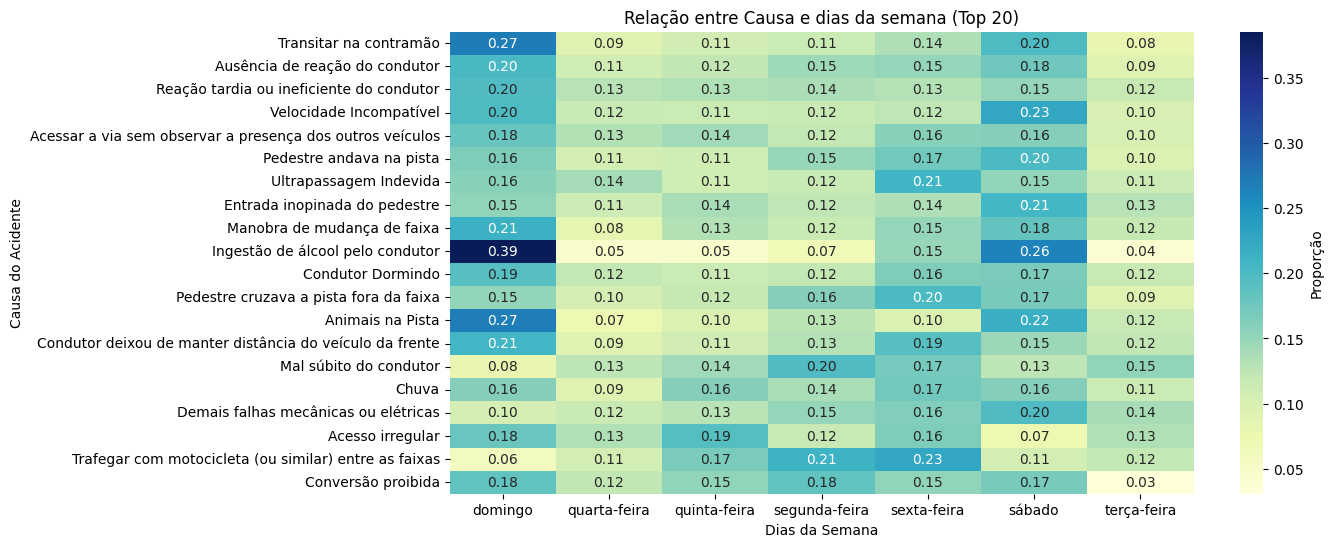

In [ ]:
# Ordenar as causas de acidentes pelo total de ocorrências
causas_ordenadas = df_acidentes_fatais['causa_acidente'].value_counts().index

# Reordenar a coluna 'causa_acidente' no DataFrame
df_acidentes_fatais['causa_acidente'] = pd.Categorical(df_acidentes_fatais['causa_acidente'], categories=causas_ordenadas, ordered=True)

# Criar uma tabela de contagem (crosstab) para a relação entre Causa e Tipo de Acidente
tabela_contagem = pd.crosstab(df_acidentes_fatais['causa_acidente'], df_acidentes_fatais['dia_semana'])

# Normalizar para obter a proporção em vez do número absoluto
tabela_proporcao = tabela_contagem.div(tabela_contagem.sum(axis=1), axis=0)

tabela_proporcao_top20_dia_da_semana = tabela_proporcao.head(20)

# Criar um heatmap com as 20 primeiras linhas
plt.figure(figsize=(12, 6))
sns.heatmap(tabela_proporcao_top20_dia_da_semana, cmap='YlGnBu', annot=True, fmt=".2f", cbar_kws={'label': 'Proporção'})
plt.title('Relação entre Causa e dias da semana (Top 20)')
plt.xlabel('Dias da Semana')
plt.ylabel('Causa do Acidente')
plt.show()

#separando modelo de treino do modelo de teste

Regressão LInear

In [ ]:
df.drop(['data_inversa','municipio','classificacao_acidente','regional'], axis=1, inplace=True)

##Mapeamento dos itens Object para transformar em numeros inteiros

Vamos criar as listas, para consultas posteriores:
- dia_semana_mapeamento
- causa_acidente_mapeamento
- tipo_acidente_mapeamento
- condicao_metereologica_mapeamento

In [ ]:
# Mapeamento de causas para números inteiros
causas_unicas = df['causa_acidente'].unique()
causa_acidente_mapeamento = {causa: indice for indice, causa in enumerate(causas_unicas)}
df['causa_acidente'] = df['causa_acidente'].map(causa_acidente_mapeamento)

# Mapeamento de causas para números inteiros
tipos_acidentes_unico = df['tipo_acidente'].unique()
tipo_acidente_mapeamento = {causa: indice for indice, causa in enumerate(tipos_acidentes_unico)}
df['tipo_acidente'] = df['tipo_acidente'].map(tipo_acidente_mapeamento)

# Mapeamento de causas para números inteiros
condicao_metereologica_unico = df['condicao_metereologica'].unique()
condicao_metereologica_mapeamento = {causa: indice for indice, causa in enumerate(condicao_metereologica_unico)}
df['condicao_metereologica'] = df['condicao_metereologica'].map(condicao_metereologica_mapeamento)




In [ ]:
# Mapeamento dos dias da semana para números inteiros
dia_semana_mapeamento = {
    'domingo': 0,
    'segunda-feira': 1,
    'terça-feira': 2,
    'quarta-feira': 3,
    'quinta-feira': 4,
    'sexta-feira': 5,
    'sábado': 6
}

# Aplicando o mapeamento à coluna 'dia_semana'
df['dia_semana'] = df['dia_semana'].map(dia_semana_mapeamento)


In [ ]:
df

id  dia_semana     br  causa_acidente  tipo_acidente  \
17039  405214           6  282.0               0              0   
17058  405237           6  290.0               1              0   
17059  405238           6   20.0               2              1   
17060  405240           6  381.0               3              2   
17061  405241           6   40.0               4              0   
...       ...         ...    ...             ...            ...   
49533  551980           6  361.0               6              4   
49534  551981           6  262.0              21              4   
49535  551982           6  381.0               1              0   
49537  551985           6   70.0              12              8   
49528  551974           6  116.0              11              6   

       condicao_metereologica  pessoas  mortos  ilesos  feridos  veiculos  \
17039                       0        1       0       0        1         1   
17058                       0        2       0       2        0         1   
17059                       1        5       0       1        4         1   
17060                       2        1       0       0        1         1   
17061                       1        2       0       1        1         1   
...                       ...      ...     ...     ...      ...       ...   
49533                       0        3       0       1        2         2   
49534                       0        2       0       1        1         2   
49535                       0        1       0       0        1         1   
49537                       0        2       0       1        0         2   
49528                       0        2       0       1        1         2   

        latitude  longitude  mes_ano  mes   ano  Acidentes  
17039 -27.691267 -50.561481  2022-01    1  2022          1  
17058 -29.864990 -50.410789  2022-01    1  2022          1  
17059 -15.577153 -47.467113  2022-01    1  2022          1  
17060 -22.303197 -45.901320  2022-01    1  2022          1  
17061 -20.047764 -43.964394  2022-01    1  2022          1  
...          ...        ...      ...  ...   ...        ...  
49533  -7.018599 -37.260780  2023-09    9  2023          1  
49534 -19.875148 -44.950312  2023-09    9  2023          1  
49535 -20.713290 -44.761347  2023-09    9  2023          1  
49537 -15.794656 -48.096779  2023-09    9  2023          1  
49528 -23.226204 -45.906830  2023-09    9  2023          1  

[113923 rows x 17 columns]

# novo teste  de regressão

In [ ]:
# Crie um DataFrame para cada mês
resultados_outubro = pd.DataFrame({
    'data_inversa': dados_outubro['data_inversa'],
    'previsao_acidentes': previsoes_outubro
})
resultados_novembro = pd.DataFrame({
    'data_inversa': dados_novembro['data_inversa'],
    'previsao_acidentes': previsoes_novembro
})
resultados_dezembro = pd.DataFrame({
    'data_inversa': dados_dezembro['data_inversa'],
    'previsao_acidentes': previsoes_dezembro
})

# Combine os DataFrames em um único DataFrame
resultados = resultados_outubro.append(resultados_novembro).append(resultados_dezembro)

# Adicione as colunas `mes` e `ano`
resultados['mes'] = resultados['data_inversa'].dt.month
resultados['ano'] = resultados['data_inversa'].dt.year

# Retorne o DataFrame com os resultados
return resultados


NameError: ignored